In [9]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "evHVYPKDjAJ0JAitpY49z7KJ4"
consumer_secret = "MpG65nQZOuf0ErIyEtaUDPA0J8aI2qIdGRcbeLmgIpXuOXbCKM"
access_token = "979169626012631041-vEFBfFZ1FCam3j9lRdqcMwn27aA2puX"
access_token_secret = "I1AJRehHaXYZbfuYs1x64hVth0nzKALMhMLxOjU2pkSmN"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
tweet_scores = []
results_list =[]


tweets_counter = []
compound_tweet = []
username = []


# Loop through each user
for user in target_user:
        # Loop through 10 pages of tweets (total 200 tweets)

    counter = 1
    oldest_tweet = None
    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(10):
     
    
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet )

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            tweets_ago = counter

            # Add each value to the appropriate list
            compound_tweet.append(compound)
            tweets_counter.append(counter)
            username.append(user)
            
            oldest_tweet= tweet['id']-1
            counter += 1
            
        mean_compound = np.mean(compound_tweet)
        results_list.append(mean_compound)
            
# Create a dictionaty of results
user_results = {
    "Username": username,
    "Compound Score": compound_tweet,
    "Tweets ago": tweets_counter
}

tweets=pd.DataFrame(user_results)
tweets



,Compound Score,Tweets ago,Username
0,-0.5994,1,@BBC
1,-0.0772,2,@BBC
2,0.7184,3,@BBC
3,0.0000,4,@BBC
4,0.0000,5,@BBC
5,0.0000,6,@BBC
6,0.6239,7,@BBC
7,0.4003,8,@BBC
8,0.5411,9,@BBC
9,0.5267,10,@BBC


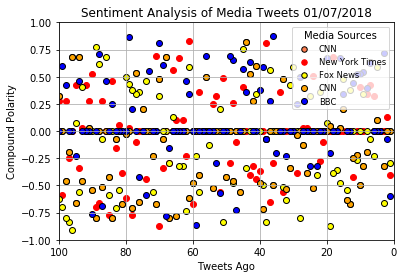

In [15]:
# Plot Time Between Tweets
user_cnn = tweets[tweets["Username"]== "@CNN"]
user_nytimes = tweets[tweets["Username"]== "@nytimes"]
user_foxnews = tweets[tweets["Username"]== "@FoxNews"]
user_cbs = tweets[tweets["Username"]== "@CBS"]
user_bbc = tweets[tweets["Username"]== "@BBC"]

cnn_x_vals = user_cnn["Tweets ago"]
cnn_y_vals = user_cnn["Compound Score"]
nytimes_x_vals = user_nytimes["Tweets ago"]
nytimes_y_vals = user_nytimes["Compound Score"]
foxnews_x_vals = user_foxnews["Tweets ago"]
foxnews_y_vals = user_foxnews["Compound Score"]
cbs_x_vals = user_cbs["Tweets ago"]
cbs_y_vals = user_cbs["Compound Score"]
bbc_x_vals = user_bbc["Tweets ago"]
bbc_y_vals = user_bbc["Compound Score"]

plt.scatter(cnn_x_vals, cnn_y_vals,
           c="coral", edgecolor="black", linewidths = 1, marker="o",label="CNN")
plt.scatter(nytimes_x_vals,nytimes_y_vals,c="red", linewidths = 1, marker = "o", label="New York Times")
plt.scatter(foxnews_x_vals, foxnews_y_vals,
           c="yellow", edgecolor="black", linewidths = 1, marker="o",label="Fox News")
plt.scatter(cbs_x_vals, cnn_y_vals,
           c="orange", edgecolor="black", linewidths = 1, marker="o",label="CNN")
plt.scatter(bbc_x_vals, bbc_y_vals,
           c="blue", edgecolor="black", linewidths = 1, marker="o",label="BBC")

plt.title("Sentiment Analysis of Media Tweets 01/07/2018")
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Polarity")
plt.grid(True)
plt.ylim(-1, 1)
plt.xlim(100,0)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Media Sources",
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

In [16]:
# Create DataFrame from Results List
tweets = pd.DataFrame(user_results).set_index("Username").round(3)
tweets

,Compound Score,Tweets ago
Username,,
@BBC,-0.599,1
@BBC,-0.077,2
@BBC,0.718,3
@BBC,0.000,4
@BBC,0.000,5
@BBC,0.000,6
@BBC,0.624,7
@BBC,0.400,8
@BBC,0.541,9


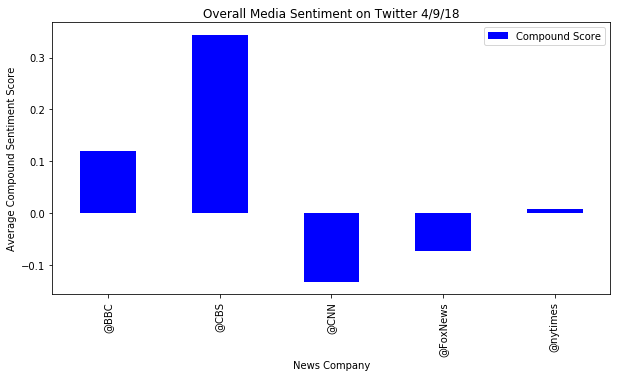

In [20]:
compound_gb = tweets.groupby(["Username"])["Compound Score"].mean()
compound_bar=pd.DataFrame(compound_gb)

colors = ["blue", "grey", "darkgrey", "grey"]
compound_bar.plot(kind="bar", figsize=(10,5), color=colors)

plt.title("Overall Media Sentiment on Twitter 4/9/18")
plt.xlabel("News Company")
plt.ylabel("Average Compound Sentiment Score")

plt.show()

In [21]:
tweets.to_csv("compound_tweet.csv", index=False, header=True)       